**ANALITICA PREDICTIVA**

TAREA: FINAL SEMANA 4

INTEGRANTES:

        Ana Prado
        Margarita Yambay



**CASO FINAL DE ANALISIS**


Modelar a su preferencia (pero justificado datos de la cadena de supermercados de EEUU, Wallmart.)

La base con la que trabajaremos este caso  práctico contiene información sobre datos históricos de las ventas de Wallmart desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

- Tienda-el número de la tienda.
- Fecha-la semana de ventas
- Weekly_Sales - ventas para la tienda dada.
- Holiday_Flag: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva.
- Temperatura - Temperatura el día de la venta.
- Fuel_price -costo del combustible en la región. 
- IPC-índice de precios al consumidor vigente. 
- Desempleo - tasa de desempleo predominante. 
- Eventos festivos.
    - Super bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\ 
    - Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\
    - Acción de Gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\
    - Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13


**1.- Importe la base de datos a una base en Jupyter Notebook con pandas.(Walmart) .**

In [1945]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [1946]:
df=pd.read_csv("data/Walmart.csv")
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**2.- Obtenga los descriptivos resumen de la base de datos e identifique las variables numérica y categóricas.
Indique , hay algo que le llame la atención?**

In [1947]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [1948]:
df.rename({'Store':'nro_tienda', 'Date': 'fecha', 'Weekly_Sales':'ventas', 'Holiday_Flag': 'feriado', 'Temperature':'temperatura','Fuel_Price':'precio_combustible','CPI':'ind_precio_consumidor','Unemployment':'tasa_desempleo'},  axis=1, inplace=True)
df

,nro_tienda,fecha,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [1949]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nro_tienda             6435 non-null   int64  
 1   fecha                  6435 non-null   object 
 2   ventas                 6435 non-null   float64
 3   feriado                6435 non-null   int64  
 4   temperatura            6435 non-null   float64
 5   precio_combustible     6435 non-null   float64
 6   ind_precio_consumidor  6435 non-null   float64
 7   tasa_desempleo         6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [1950]:
var_cuantitativas = df.select_dtypes('number').columns
print("Variables cuantitativas:", var_cuantitativas)

var_cualitativas  =df.select_dtypes('object').columns
print("Variables cualitativas:", var_cualitativas)



Variables cuantitativas: Index(['nro_tienda', 'ventas', 'feriado', 'temperatura', 'precio_combustible',
       'ind_precio_consumidor', 'tasa_desempleo'],
      dtype='object')
Variables cualitativas: Index(['fecha'], dtype='object')





**Los tipos de variables identificadas son:**

**VARIABLES NUMERICAS:**  nro_tienda, ventas, feriado, temperatura, precio_combustible,    ind_precio_consumidor, tasa_desempleo.

**VARIABLES CATEGORICAS:** fecha

    Se puede observar completitud de los datos (6435 registros).
    La variable feriado esta dumificada.
    Se puede visualizar información en grupo respecto a las tiendas (total 45 tiendas o almacenes)

**3._Evalúe si la base contiene datos perdidos.**

In [1951]:
df.isna().sum()

nro_tienda               0
fecha                    0
ventas                   0
feriado                  0
temperatura              0
precio_combustible       0
ind_precio_consumidor    0
tasa_desempleo           0
dtype: int64

**En la data no hay valores nulos o perdidos.**

**4._Evalúe si alguna de las variables contiene datos atípicos (outliers)** 

-De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 


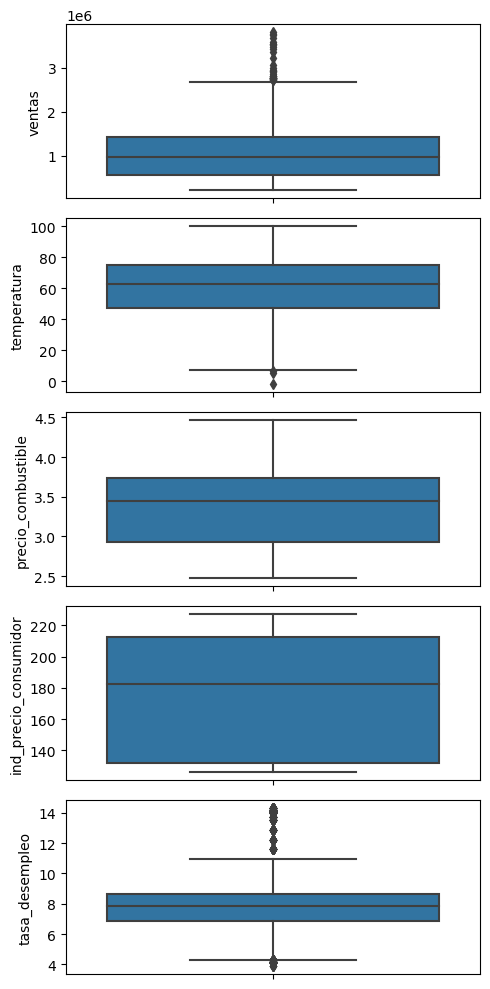

In [1952]:
# Identificamos a través de la función Box plots

fig, axs = plt.subplots(5, figsize = (5,10))

plt1 = sns.boxplot(y=df['ventas'], ax = axs[0])
plt2 = sns.boxplot(y=df['temperatura'], ax = axs[1])
plt3 = sns.boxplot(y=df['precio_combustible'], ax = axs[2])
plt4 = sns.boxplot(y=df['ind_precio_consumidor'], ax = axs[3])
plt5 = sns.boxplot(y=df['tasa_desempleo'], ax = axs[4])

plt.tight_layout()

**En la gráfica podemos observar datos atípicos en las variables de: ventas,temperatura, tasa de desempleo.**

**Para corregir estos valores atípicos, removemos las observaciones que se encuentran fuera del rango 1.5xIQR.**

In [1953]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['ventas'].quantile(0.25)
Q3 = df['ventas'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

866808.5549999999


In [1954]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['ventas'] < (Q1 - 1.5 * IQR)) |(df['ventas'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 8)

In [1955]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['temperatura'].quantile(0.25)
Q3 = df['temperatura'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

27.340000000000003


In [1956]:
#Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['temperatura'] < (Q1 - 1.5 * IQR)) |(df['temperatura'] > (Q3 + 1.5 * IQR)))]
df.shape

(6398, 8)

In [1957]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['tasa_desempleo'].quantile(0.25)
Q3 = df['tasa_desempleo'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

1.7309999999999999


In [1958]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['tasa_desempleo'] < (Q1 - 1.5 * IQR)) |(df['tasa_desempleo'] > (Q3 + 1.5 * IQR)))]
df.shape

(5917, 8)

In [1959]:
#PARA USO DE REGRESION LINEAL
dfr = df

In [1960]:
#Revisión de los valores actualizadas de las variables
df.describe()

,nro_tienda,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo
count,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,22.801251,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305
std,13.094060,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000
50%,22.000000,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000
75%,34.000000,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


**Revisión descriptivos:**


Se observa que el estudio esta realizado sobre 45 tiendas (max nro_tienda= 45 almacenes)

También se observa que las ventas (semanales) tienen una media de alrededor 1039313 unidades, desviación estándar de aproximadamente 551945 unidades. 

La tasa de desempleo va de un valor mínimo de 1.243 a un valor máximo considerable 10.926.

El indice de precio al consumidor va de un valor mínimo de 39.023 a un valor máximo considerable 227.23.

El precio del combustible tiene valores promedio de 3.34 unidades.

Existen cambios de temperatura que va de 7.46 grados a 100.14 grados.

**5.Grafique las distribuciones de las variables y a priori comente sobre ellas.**

<Axes: xlabel='ventas', ylabel='Density'>

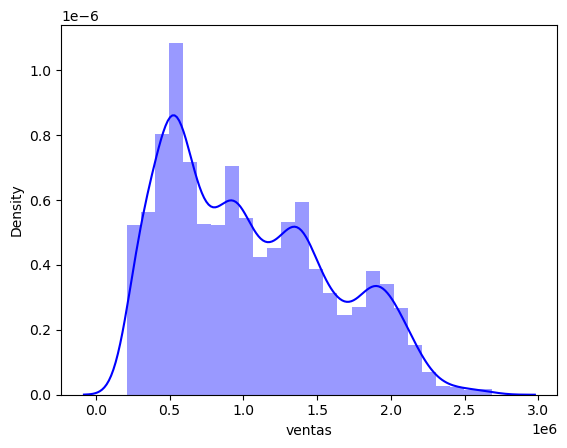

In [1961]:
sns.distplot(df['ventas'],color="blue")


* Del gráfico podríamos indicar que la distribución multimodal, están sesgados a la derecha, el sesgo estadístico es positivo. 

<Axes: xlabel='temperatura', ylabel='Density'>

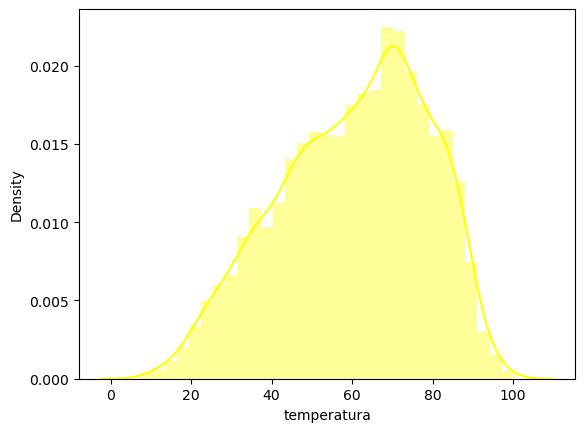

In [1962]:
sns.distplot(df['temperatura'],color="yellow")


* Del gráfico con la variable temperatura podríamos indicar que la distribución esta sesgada hacia la izquierda lo que nos indica que hay pocos valores bajos y muchos valores altos. 

<Axes: xlabel='precio_combustible', ylabel='Density'>

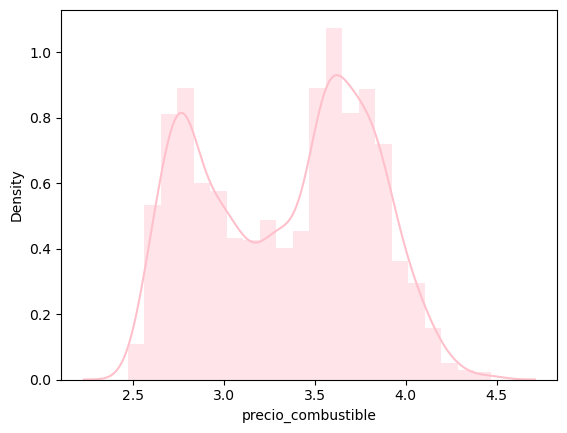

In [1963]:
sns.distplot(df['precio_combustible'],color="pink")


* Del gráfico con la variable temperatura podríamos indicar que la distribución es bimodal, tiene dos picos.

<Axes: xlabel='ind_precio_consumidor', ylabel='Density'>

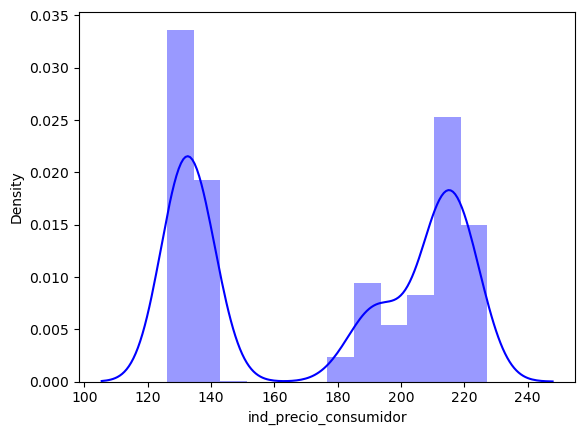

In [1964]:
sns.distplot(df['ind_precio_consumidor'],color="blue")


* Del gráfico con la variable temperatura podríamos indicar que la distribución es bimodal, se puede identificar dos picos.

<Axes: xlabel='tasa_desempleo', ylabel='Density'>

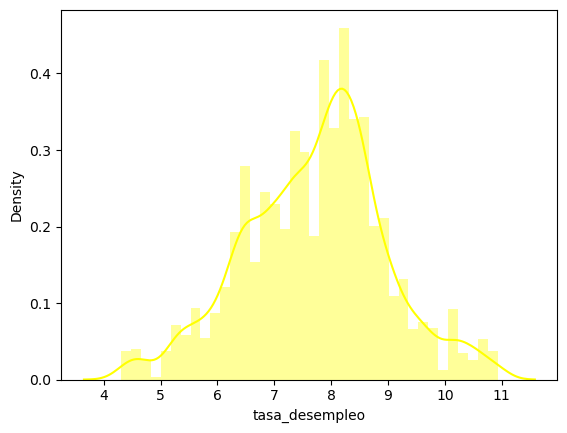

In [1965]:
sns.distplot(df['tasa_desempleo'],color="yellow")

* Del gráfico con la variable temperatura podríamos indicar que la distribución esta sesgada hacia la izquierda lo que nos indica que hay pocos valores bajos y muchos valores altos. 

**6.-Obtenga las correlaciones entre los datos de corte numérico.**

In [1966]:
#Obtenémos el gráfico de correlación de las variables del modelo

dfc=df[["ventas","nro_tienda","temperatura","precio_combustible","ind_precio_consumidor","tasa_desempleo","feriado"]]
dfc.corr().style.background_gradient(cmap='coolwarm')

,ventas,nro_tienda,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo,feriado
ventas,1.000000,-0.319354,-0.041686,0.019664,-0.082977,-0.073092,0.024390
nro_tienda,-0.319354,1.000000,-0.027045,0.047519,-0.208637,0.309645,0.004289
temperatura,-0.041686,-0.027045,1.000000,0.145157,0.217847,0.024204,-0.157220
precio_combustible,0.019664,0.047519,0.145157,1.000000,-0.144515,-0.105214,-0.076529
ind_precio_consumidor,-0.082977,-0.208637,0.217847,-0.144515,1.000000,-0.219020,-0.000450
tasa_desempleo,-0.073092,0.309645,0.024204,-0.105214,-0.219020,1.000000,0.011031
feriado,0.024390,0.004289,-0.157220,-0.076529,-0.000450,0.011031,1.000000


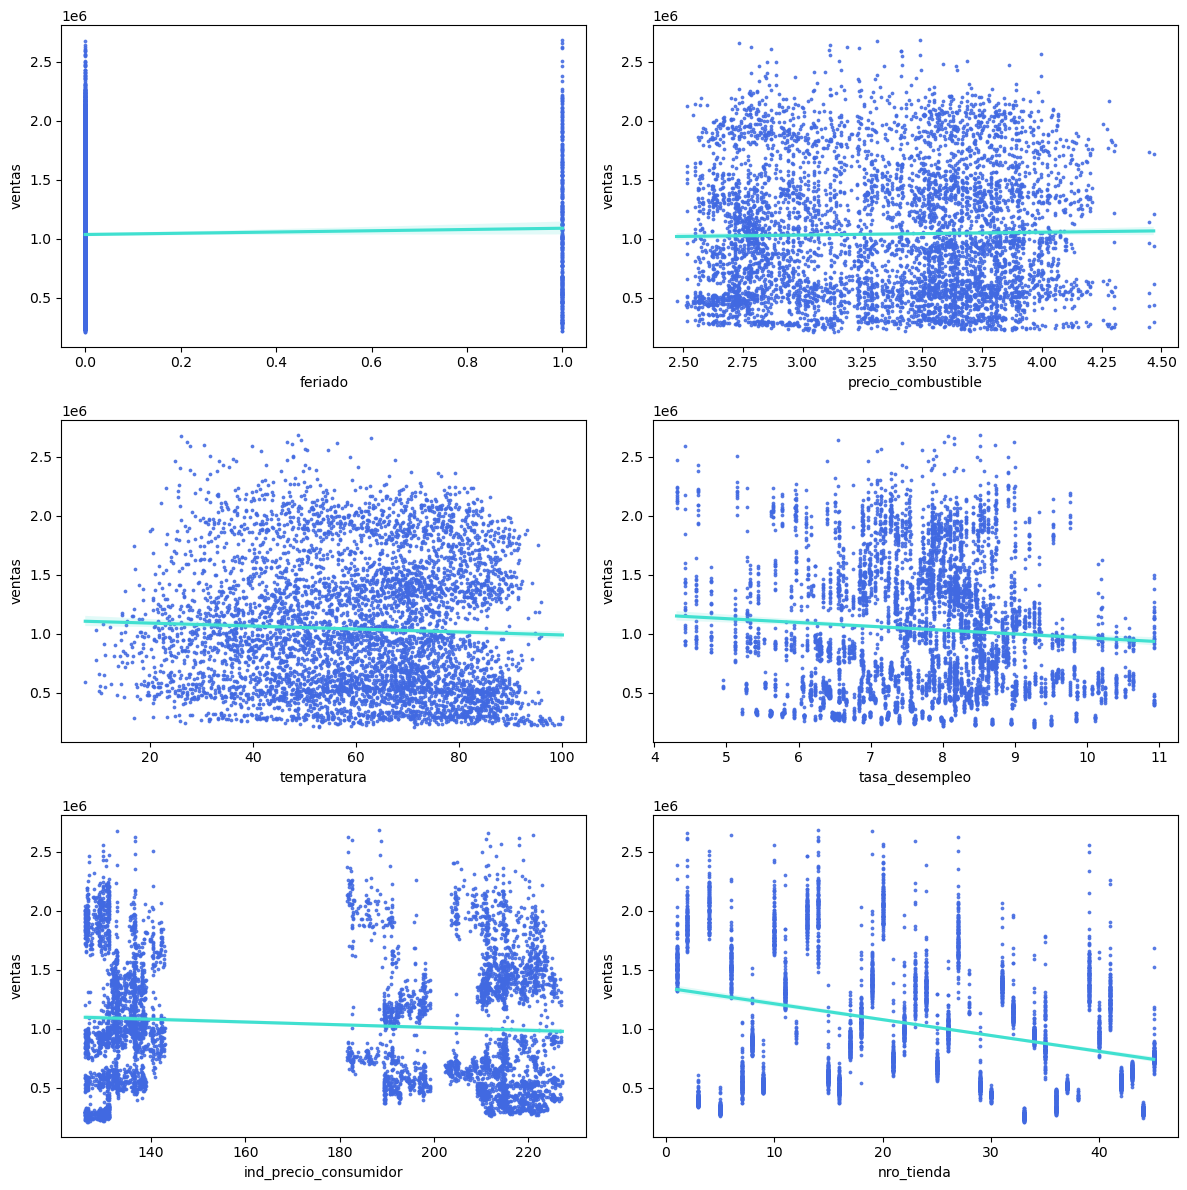

In [1967]:
# Número de las variables
n = 7
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = dfc.corr()
#
cols = corr.nlargest(7, "ventas")["ventas"].index
# Calculate correlation
for i in np.arange(1,7):
    regline = dfc[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=dfc['ventas'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()


**7.-Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.**

Como variable dependiente (y) se escoge **ventas**, las ventas son el objeto de estudio en el modelo. 
Como variables explicativas o independientes (x)  **precio_combustible, temperatura, tasa_desempleo, ind_precio_consumidor, feriado**, se observa por los gráficos donde se analiza la correlación y dispersión, las variables que tienen mayor incidencia en el modelo según se aprecia inicialmente son precio y temperatura.



**8.-Indique que tipo de modelación realizarán y porqué.**

En vista que tenemos en la data una variable fecha y además tienen variable de grupo de número de tienda y hay una variable ventas que depende de varias factores independientes como son  precio_combustible, temperatura, tasa_desempleo, ind_precio_consumidor, feriado, a priori vamos a probar el modelo de panel.

**1-MODELO DE DATOS DE PANEL CON VARIABLE DEPENDIENTE VENTAS**

Requerimos especificar los índice para nuestra base de datos. En este caso, setiaremos la fecha y el número de tienda

In [1968]:
df=df.set_index(['fecha', 'nro_tienda'])

In [1969]:
fecha = df.index.get_level_values('fecha').to_list()
df['fecha'] = pd.Categorical(fecha)

In [1970]:
!pip install linearmodels
from linearmodels import PooledOLS
import statsmodels.api as sm

In [1971]:
dfc1=df[["temperatura","precio_combustible","ind_precio_consumidor","tasa_desempleo","feriado"]]
X = sm.tools.tools.add_constant(dfc1)
y = df.ventas

In [1972]:
y

fecha       nro_tienda
05-02-2010  1             1643690.90
12-02-2010  1             1641957.44
19-02-2010  1             1611968.17
26-02-2010  1             1409727.59
05-03-2010  1             1554806.68
                             ...    
28-09-2012  45             713173.95
05-10-2012  45             733455.07
12-10-2012  45             734464.36
19-10-2012  45             718125.53
26-10-2012  45             760281.43
Name: ventas, Length: 5917, dtype: float64

In [1973]:
X

,,const,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo,feriado
fecha,nro_tienda,,,,,,
05-02-2010,1,1.0,42.31,2.572,211.096358,8.106,0
12-02-2010,1,1.0,38.51,2.548,211.242170,8.106,1
19-02-2010,1,1.0,39.93,2.514,211.289143,8.106,0
26-02-2010,1,1.0,46.63,2.561,211.319643,8.106,0
05-03-2010,1,1.0,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...,...,...
28-09-2012,45,1.0,64.88,3.997,192.013558,8.684,0
05-10-2012,45,1.0,64.89,3.985,192.170412,8.667,0
12-10-2012,45,1.0,54.47,4.000,192.327265,8.667,0


In [1974]:
modelo1 = PooledOLS(y, X)

In [1975]:
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [1976]:
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values

In [1977]:
residuos_pooled_OLS = resultados_pooled_OLS.resids
resultados_pooled_OLS

Dep. Variable:,ventas,R-squared:,0.0165
Estimator:,PooledOLS,R-squared (Between):,0.0140
No. Observations:,5917,R-squared (Within):,0.0166
Date:,"Tue, Mar 19 2024",R-squared (Overall):,0.0165
Time:,23:48:15,Log-likelihood,-8.658e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,19.780
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(5,5911)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,233.60


De acuerdo al resultado del modelo1 se identifica las variables mas significativas, y se diseña el modelo 2.
El r2 es bajo al momento 0.0165.

In [1978]:
dfc2=df[["ind_precio_consumidor","tasa_desempleo"]]
X = sm.tools.tools.add_constant(dfc2)
y = df.ventas

In [1979]:
modelo2 = PooledOLS(y, X)

In [1980]:
resultados_pooled_OLS_2 = modelo2.fit(cov_type='clustered', cluster_entity=True)

In [1981]:
# checking homoskedasticity graphically
predicciones_pooled_OLS_2 = resultados_pooled_OLS_2.predict().fitted_values

In [1982]:
residuos_pooled_OLS_2 = resultados_pooled_OLS_2.resids
resultados_pooled_OLS_2

Dep. Variable:,ventas,R-squared:,0.0156
Estimator:,PooledOLS,R-squared (Between):,-0.0322
No. Observations:,5917,R-squared (Within):,0.0166
Date:,"Tue, Mar 19 2024",R-squared (Overall):,0.0156
Time:,23:48:16,Log-likelihood,-8.658e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,46.964
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(2,5914)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,509.33


Una vez ejecutado el modelo final con datos de Panel, con las variables significativas: ind_precio_consumidor y tasa_desempleo, se observa que el r2 sigue siendo bajo 0.0156, NO ES ACEPTABLE EL MODELO.

**Por lo que ahora intentaremos con REGRESION LINEAL-Machine Learning el realizar el análisis de la información de Walmart.**

**2-MODELO REGRESION LINEAL VARIABLE DEPENDIENTE VENTAS**

In [1983]:
from sklearn.linear_model import LinearRegression

In [1984]:
dfr[['dia', 'mes', 'anio']] = dfr['fecha'].str.split('-', expand=True)
dfr


,nro_tienda,fecha,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo,dia,mes,anio
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [1985]:
var_cuantitativas_r = dfr.select_dtypes('number').columns
var_cualitativas_r  =dfr.select_dtypes('object').columns
print("Variables cuantitativas:", var_cuantitativas_r )
print("Variables cualitativas", var_cualitativas_r )

Variables cuantitativas: Index(['nro_tienda', 'ventas', 'feriado', 'temperatura', 'precio_combustible',
       'ind_precio_consumidor', 'tasa_desempleo'],
      dtype='object')
Variables cualitativas Index(['fecha', 'dia', 'mes', 'anio'], dtype='object')


In [1986]:
from sklearn.preprocessing import LabelEncoder

In [1987]:
labelencoder = LabelEncoder()

In [1988]:
dfr[var_cualitativas_r] = dfr[var_cualitativas_r].apply(labelencoder.fit_transform)

In [1989]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5917 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nro_tienda             5917 non-null   int64  
 1   fecha                  5917 non-null   int32  
 2   ventas                 5917 non-null   float64
 3   feriado                5917 non-null   int64  
 4   temperatura            5917 non-null   float64
 5   precio_combustible     5917 non-null   float64
 6   ind_precio_consumidor  5917 non-null   float64
 7   tasa_desempleo         5917 non-null   float64
 8   dia                    5917 non-null   int32  
 9   mes                    5917 non-null   int32  
 10  anio                   5917 non-null   int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 462.3 KB


In [1990]:
Xrl = dfr[["nro_tienda","ind_precio_consumidor","precio_combustible","temperatura"]]
yrl = dfr.ventas

In [1991]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5917 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nro_tienda             5917 non-null   int64  
 1   fecha                  5917 non-null   int32  
 2   ventas                 5917 non-null   float64
 3   feriado                5917 non-null   int64  
 4   temperatura            5917 non-null   float64
 5   precio_combustible     5917 non-null   float64
 6   ind_precio_consumidor  5917 non-null   float64
 7   tasa_desempleo         5917 non-null   float64
 8   dia                    5917 non-null   int32  
 9   mes                    5917 non-null   int32  
 10  anio                   5917 non-null   int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 462.3 KB


In [1992]:
from sklearn.model_selection import train_test_split

In [1993]:
Xrl_train , Xrl_test , yrl_train , yrl_test = train_test_split(Xrl , yrl , test_size = 0.20,random_state =123)

In [1994]:
print(Xrl_train.shape,"",type(Xrl_train))
print(yrl_train.shape,"\t ",type(yrl_train))
print(Xrl_test.shape,"",type(Xrl_test))
print(yrl_test.shape,"\t ",type(yrl_test))

(4733, 4)  <class 'pandas.core.frame.DataFrame'>
(4733,) 	  <class 'pandas.core.series.Series'>
(1184, 4)  <class 'pandas.core.frame.DataFrame'>
(1184,) 	  <class 'pandas.core.series.Series'>


In [1995]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(Xrl_train, yrl_train)

LinearRegression()

In [1996]:
predicciones_train_rl = modelo_regresion.predict(Xrl_train)
predicciones_test_rl = modelo_regresion.predict(Xrl_test)

In [1997]:
from sklearn.metrics import r2_score

In [1998]:
r_square_train = r2_score(yrl_train, predicciones_train_rl)
r_square_test  = r2_score(yrl_test, predicciones_test_rl)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.12423530186261478
El R^2 del subconjunto de prueba es: 0.13183381206206424


**CON REGRESION LINEAL tampoco obtenemos un r2 aceptable ya que es menor a 0.50, NO ES ACEPTABLE EL MODELO**


**3_MODELO DE DATOS DE PANEL CON VARIABLE DEPENDIENTE INDICE DE PRECIO AL CONSUMIDOR**

In [1999]:
dfp=df[["temperatura","precio_combustible","ventas","tasa_desempleo","feriado"]]
Xp= sm.tools.tools.add_constant(dfp)
yp= df.ind_precio_consumidor

In [2000]:
modelop1 = PooledOLS(yp, Xp)
resultados_pooled_OLSp = modelop1.fit(cov_type='clustered', cluster_entity=True)
predicciones_pooled_OLSp = resultados_pooled_OLSp.predict().fitted_values
residuos_pooled_OLSp = resultados_pooled_OLSp.resids
resultados_pooled_OLSp

Dep. Variable:,ind_precio_consumidor,R-squared:,0.1477
Estimator:,PooledOLS,R-squared (Between):,-7.1192
No. Observations:,5917,R-squared (Within):,0.2108
Date:,"Tue, Mar 19 2024",R-squared (Overall):,0.1477
Time:,23:48:16,Log-likelihood,-2.96e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,204.87
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(5,5911)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,345.21


De acuerdo al resultado del modelop1 se identifica que las variables seleccionadas tienen un p-value < 0.05 (a priori todas son significativas), y a continuación se diseña el modelo 2 sin la variable feriado que según p.value no es significativa.

In [2001]:
dfp2=df[["temperatura","precio_combustible","ventas","tasa_desempleo"]]
Xp = sm.tools.tools.add_constant(dfp2)
yp = df.ind_precio_consumidor

In [2002]:
modelop2 = PooledOLS(yp, Xp)
resultados_pooled_OLS_2p = modelop2.fit(cov_type='clustered', cluster_entity=True)
predicciones_pooled_OLS_2p = resultados_pooled_OLS_2p.predict().fitted_values
residuos_pooled_OLS_2p = resultados_pooled_OLS_2p.resids
resultados_pooled_OLS_2p

Dep. Variable:,ind_precio_consumidor,R-squared:,0.1469
Estimator:,PooledOLS,R-squared (Between):,-7.1383
No. Observations:,5917,R-squared (Within):,0.2102
Date:,"Tue, Mar 19 2024",R-squared (Overall):,0.1469
Time:,23:48:16,Log-likelihood,-2.961e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,254.49
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(4,5912)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,421.68


**9. Verifique los supuestos, de haber escogido el enfoque econométrico**

**SUPUESTOS DE DATOS DE PANEL CON VARIABLE DEPENDIENTE VENTAS**

**Homocedasticidad**

Para validar este supuesto, primero graficaremos los residuos y validaremos la prueba gráfica con el test estadístico de  Breusch-Pagan.

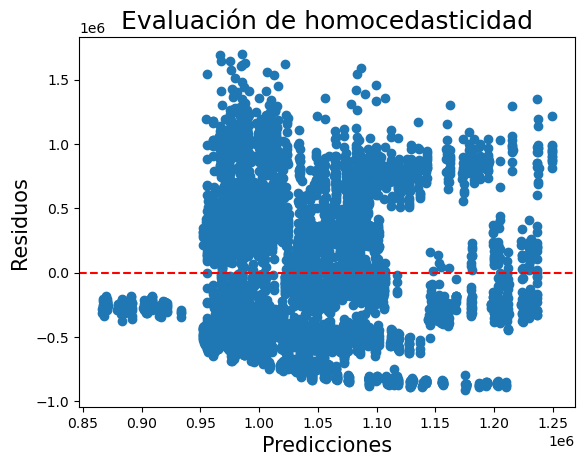

In [2003]:
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS_2, residuos_pooled_OLS_2)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

Comprobemos esta intuición gráfcia con el test de Breusch-Pagan:

In [2004]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [2005]:
pooled_OLS_df_2 = pd.concat([df, residuos_pooled_OLS_2], axis=1)


In [2006]:
pooled_OLS_df_2 = pooled_OLS_df_2.drop(['fecha'], axis = 1).fillna(0)


In [2007]:
X_ = sm.tools.tools.add_constant(dfc1).fillna(0)

In [2008]:
pooled_OLS_df_2

,,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo,residual
fecha,nro_tienda,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,673755.530225
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106,672236.500139
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,642316.308579
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,440120.581748
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,585244.524917
...,...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684,-260227.094684
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667,-240438.759385
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667,-239198.800712


In [2009]:
breusch_pagan = het_breuschpagan(pooled_OLS_df_2.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 113.22834242120994, 'LM p-val': 8.511074831773667e-23, 'F-Stat': 23.064061494486413, 'F p-val': 5.2031365818457886e-23}


Como el p-valor del estadístico de Breush-Pagan es < 0.05 (8.511074831773667e-23), entonces se rechaza la hipótesis nula, y por lo tanto estamos en la presencia de heterocedasticidad.

    Ho:Las varianzas del error son iguales, hay presencia de homocedasticidad
    Hi:Las varianzas del error no son iguales, hay presencia de heterocedasticidad

**No-autocorrelación**

In [2010]:
from statsmodels.stats.stattools import durbin_watson

In [2011]:
durbin_watson = durbin_watson(pooled_OLS_df_2.residual) 
print(durbin_watson)

0.08702185504450755


Según la  prueba de Durbin Watson se puede concluir que existe una correlación positiva de 0.087 entre las variables seleccionadas.

- 0 - 2 significa una autocorrelación positiva (cuanto más cerca de cero, mayor es la correlación)

**SUPUESTOS DE DATOS DE PANEL CON VARIABLE DEPENDIENTE INDICE DE PRECIO AL CONSUMIDOR**

**Homocedasticidad**

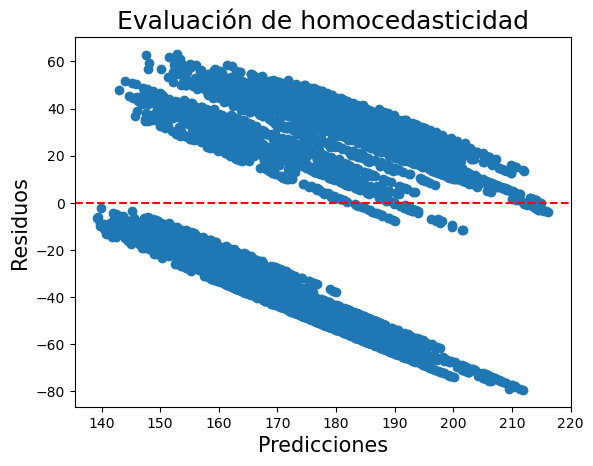

In [2012]:
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS_2p, residuos_pooled_OLS_2p)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

In [2013]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [2014]:
pooled_OLS_df_2p = pd.concat([df, residuos_pooled_OLS_2p], axis=1)
pooled_OLS_df_2p = pooled_OLS_df_2p.drop(['fecha'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(dfp2).fillna(0)

In [2015]:
pooled_OLS_df_2p

,,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo,residual
fecha,nro_tienda,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,38.995552
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106,40.728123
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,39.240762
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,35.292874
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,37.406258
...,...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684,31.765149
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667,31.696127
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667,37.655543


In [2016]:
breusch_pagan = het_breuschpagan(pooled_OLS_df_2p.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 425.4243328099318, 'LM p-val': 8.914749483575605e-91, 'F-Stat': 114.49849769889663, 'F p-val': 3.4791595375803306e-94}


Como el p-valor del estadístico de Breush-Pagan es < 0.05 (8.914749483575605e-91), entonces se rechaza la hipótesis nula, y por lo tanto estamos en la presencia de heterocedasticidad.

**No-autocorrelación**

In [2017]:
from statsmodels.stats.stattools import durbin_watson

In [2018]:
durbin_watson = durbin_watson(pooled_OLS_df_2p.residual) 
print(durbin_watson)

0.023139144128356635


Según la  prueba de Durbin Watson se puede concluir que existe una correlación positiva de 0.023 entre las variables seleccionadas.


**10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.**

**DATOS DE PANEL CON VARIABLE DEPENDIENTE VENTAS**

Para identificar el modelo definitivo es necesario realizar los modelos:

**Modelo de Efectos Fijos "Fixed effects"**

In [2019]:
from linearmodels import PanelOLS

In [2020]:
modelo_fe = PanelOLS(y, X, entity_effects = True)
resultados_fe = modelo_fe.fit()

In [2021]:
resultados_fe

Dep. Variable:,ventas,R-squared:,0.0167
Estimator:,PanelOLS,R-squared (Between):,-0.0353
No. Observations:,5917,R-squared (Within):,0.0167
Date:,"Tue, Mar 19 2024",R-squared (Overall):,0.0156
Time:,23:48:18,Log-likelihood,-8.651e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,48.877
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(2,5772)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,48.877


**Modelo de Efectos Aleatoreos "RandomEffects"**

In [2022]:
from linearmodels import RandomEffects

In [2023]:
modelo_re = RandomEffects(y, X)
resultados_re = modelo_re.fit()

In [2024]:
resultados_re

Dep. Variable:,ventas,R-squared:,0.0156
Estimator:,RandomEffects,R-squared (Between):,-0.0322
No. Observations:,5917,R-squared (Within):,0.0166
Date:,"Tue, Mar 19 2024",R-squared (Overall):,0.0156
Time:,23:48:18,Log-likelihood,-8.658e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,46.964
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(2,5914)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,46.964


**Test de Haussman**

Como ambos modelos devuelven resultados similares,  para seleccionar el modelo, aplicaremos el test de Hausman.

Con las siguientes hipótesis:

- Ho: El modelo preferido es el de efectos aleatorios
- Hi: El modelo preferido es el de efectos fijos

In [2025]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [2026]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [2027]:
hausman = hausman(resultados_fe, resultados_re) 

In [2028]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 5.563096942504234
degrees of freedom: 3
p-Value:0.13491305222506733


Considerando que p-valor es  (0.13491305222506733). En consecuencia, el modelo de efectos randómicos parece ser el más adecuado.


**DATOS DE PANEL CON VARIABLE DEPENDIENTE INDICE DE PRECIO AL CONSUMIDOR**

**Modelo de Efectos Fijos**

In [2029]:
from linearmodels import PanelOLS

In [2030]:
modelo_fep = PanelOLS(yp, Xp, entity_effects = True)
resultados_fep = modelo_fep.fit()

In [2031]:
resultados_fep

Dep. Variable:,ind_precio_consumidor,R-squared:,0.4686
Estimator:,PanelOLS,R-squared (Between):,-264.08
No. Observations:,5917,R-squared (Within):,0.4686
Date:,"Tue, Mar 19 2024",R-squared (Overall):,-1.8229
Time:,23:48:18,Log-likelihood,-2.818e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1272.0
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(4,5770)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,1272.0


**Modelo de Efectos Aleatoreos "RandomEffects"**

In [2032]:
modelo_rep = RandomEffects(yp, Xp)
resultados_rep = modelo_rep.fit()
resultados_rep 

Dep. Variable:,ind_precio_consumidor,R-squared:,0.1469
Estimator:,RandomEffects,R-squared (Between):,-7.1383
No. Observations:,5917,R-squared (Within):,0.2102
Date:,"Tue, Mar 19 2024",R-squared (Overall):,0.1469
Time:,23:48:19,Log-likelihood,-2.961e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,254.49
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(4,5912)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,254.49


**Test de Haussman**

In [2033]:
def hausman(fep, rep):
    b = fep.params
    B = rep.params
    v_b = fep.cov
    v_B = rep.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [2034]:
hausman = hausman(resultados_fep, resultados_rep) 

In [2035]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 4432.635586560019
degrees of freedom: 5
p-Value:0.0


Considerando que p-valor es  0. En consecuencia, el modelo de efectos fijos parece ser el más adecuado.

**11. Grafique a los valores predicho de modelo vs los valores reales.
¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.**

**MODELO DE DATOS DE PANEL CON VARIABLE DEPENDIENTE VENTAS**

In [2036]:
from sklearn.model_selection import train_test_split

In [2037]:
#Datos Observados
X = df[df.columns.difference(['ventas'])]
y = df.ventas 


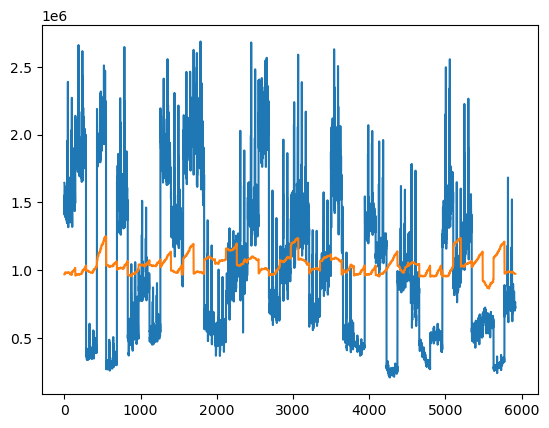

In [2038]:
predicciones_re = resultados_re.predict()
fig, ax = plt.subplots()
ax.plot(y.values)
ax.plot(predicciones_re.values)

**MODELO DE DATOS DE PANEL CON VARIABLE DEPENDIENTE INDICE DE PRECIO CONSUMIDOR**

In [2039]:
#Datos Observados
X = df[df.columns.difference(['ind_precio_consumidor'])]
y = df.ind_precio_consumidor 


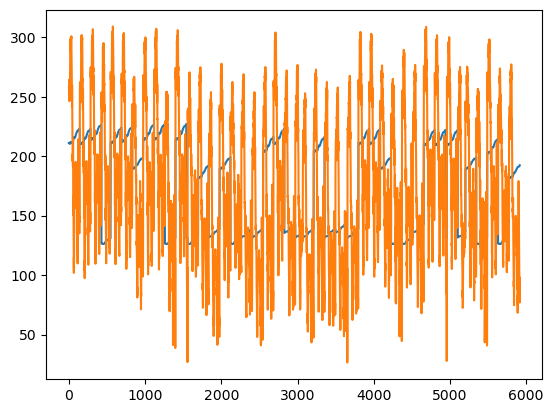

In [2040]:
predicciones_fep = resultados_fep.predict()
fig, ax = plt.subplots()
ax.plot(y.values)
ax.plot(predicciones_fep.values)

**12.-Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.**

**Conclusiones**

Inicialmente se escoge el modelo de panel de control (enfoque econométrico), ya que se observo variables como fecha y variable de grupo como es el número de tienda o almacen, que indicaba a priori que las ventas era la variable dependiente a predecir.

* Variables con Mayor Significancia

Entre variables que se revisan su importancia, encontramos estas: ind_precio_consumidor, tasa_desempleo, precio_combustible y temperatura.

* Modelamientos

Sin embargo luego de obtener el análisis en el primer modelo de datos de panel con variable dependiente ventas, obtuvimos un r2 muy pequeño por lo que se hizo un par de análisis más para tratar de obtener mejores resultados en el modelamiento.

En el segundo modelo de regresion lineal-machine learning, no se pudo obtener un r cuadrado significativo que de como aceptable al modelo.

En el tercer modelo de datos de panel, tratamos de obtener un mejor r cuadrado con la variable dependiente indice de precio al consumidor, si se consiguió incrementar el r cuadrado, sin embargo al ser R-squared:0.4686 menor a 0.50 tampoco se considera un modelo aceptable.

Se llega a la conclusión que para realizar un análisis más detallado tal vez es necesario incluir más variables o factores específicos que  contribuyan a un mejor resultado que permitan predecir de mejor las ventas.


* Nota

Se investigo este modelo un poco más a fondo, llegando a obtener un input, de que el modelamiento adecuado para esta data teniendo como  variable dependiente las ventas, el modelo más acertado es el Random Forest, el cual no logramos ver en clase por lo que no se pudo desarrollar el mismo en la tarea planteada.

